In [4]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [5]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                names = ["Sepal Length","Sepal Width","Petal Length","Petal Width","class"])

In [6]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.shape

(150, 5)

In [10]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
class           0
dtype: int64

<AxesSubplot:>

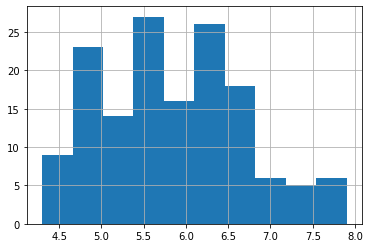

In [13]:
df['Sepal Length'].hist()

<AxesSubplot:>

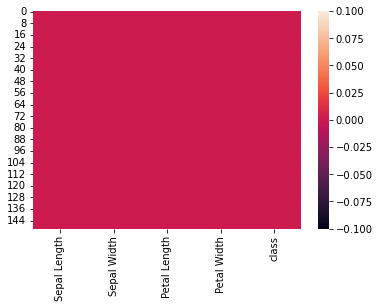

In [14]:
sns.heatmap(df.isnull())

<AxesSubplot:>

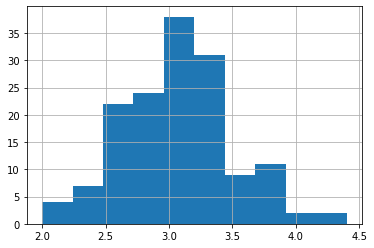

In [15]:
df['Sepal Width'].hist()

<AxesSubplot:>

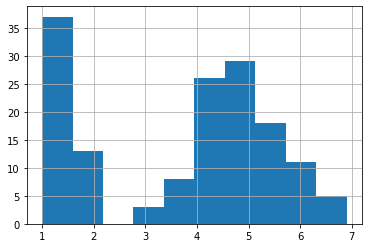

In [16]:
df['Petal Length'].hist()

<AxesSubplot:>

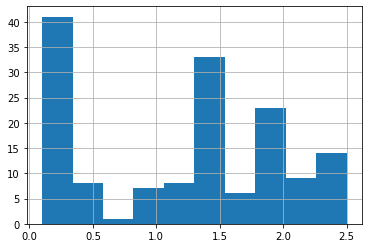

In [17]:
df['Petal Width'].hist()

In [18]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

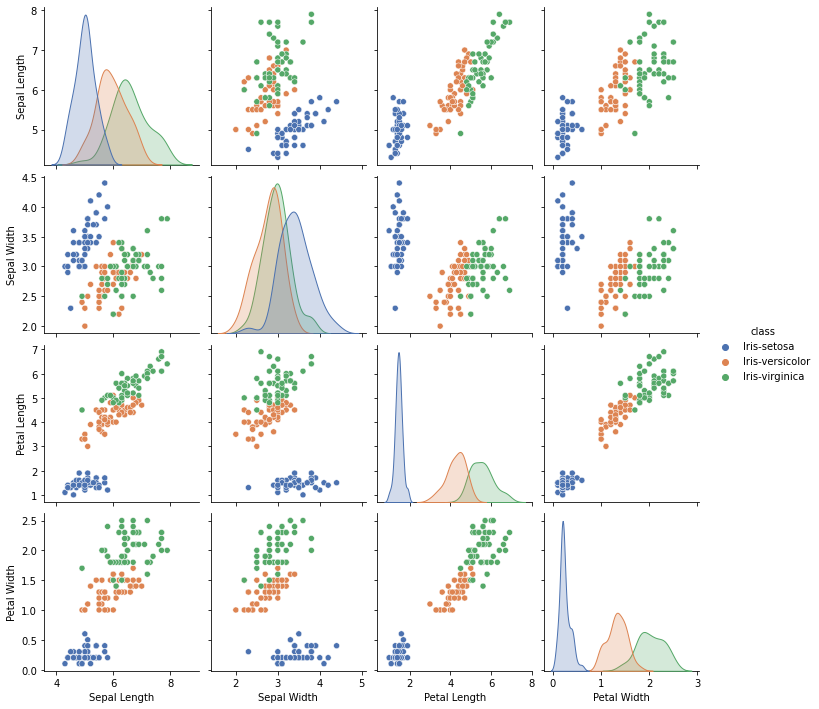

In [19]:
sns.pairplot(df, hue='class', palette='deep')
plt.show()

In [20]:
x = df.drop(['class'], axis =1)
y = df['class']

In [21]:
x

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [23]:
df.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

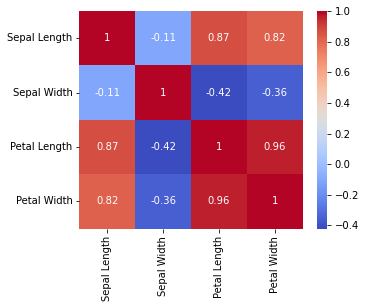

In [24]:
corr=df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot= True, ax=ax, cmap = 'coolwarm')

# label enoder

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
df['class']= le.fit_transform(df['class'])
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# model training logistic regression

In [29]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [30]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()


In [31]:
sc

StandardScaler()

In [32]:
x_std = sc.fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split

x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [36]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(random_state=0, multi_class='ovr')

In [38]:
lr.fit(x_std, y)

LogisticRegression(multi_class='ovr', random_state=0)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [40]:
y_pred = lr.predict(x_std)

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)*100

94.66666666666667